# Analysis

In [25]:
import pandas as pd

df = pd.read_csv("../results/cluster_3.csv")
df

,dataset,backend,estimators,max_depth,accuracy,train_time,predict_time,threads,nodes
0,magic,seq,64,0,0.999947,31.59240,0.127890,1,1
1,magic,omp,64,0,0.999842,16.84590,0.070253,2,1
2,magic,ff,64,0,0.999895,17.13830,0.014734,2,1
3,magic,omp,64,0,0.999895,8.32864,0.040466,4,1
4,magic,ff,64,0,0.999947,8.65146,0.020357,4,1
5,magic,omp,64,0,0.999790,4.43482,0.021279,8,1
6,magic,ff,64,0,0.999842,4.34412,0.021180,8,1
7,magic,omp,64,0,1.000000,2.24760,0.015074,16,1
8,magic,ff,64,0,0.999842,2.19799,0.018571,16,1
9,magic,omp,64,0,0.999685,1.65721,0.015169,32,1


In [26]:
df = df[df["estimators"] == 512].sort_values(by=["threads", "backend"])
df = df[["train_time", "threads", "backend"]]
df

,train_time,threads,backend
33,252.3780,1,seq
35,137.5450,2,ff
34,132.1020,2,omp
37,69.1642,4,ff
36,68.5350,4,omp
39,34.5952,8,ff
38,35.3095,8,omp
41,17.4156,16,ff
40,17.4922,16,omp
43,13.1521,32,ff


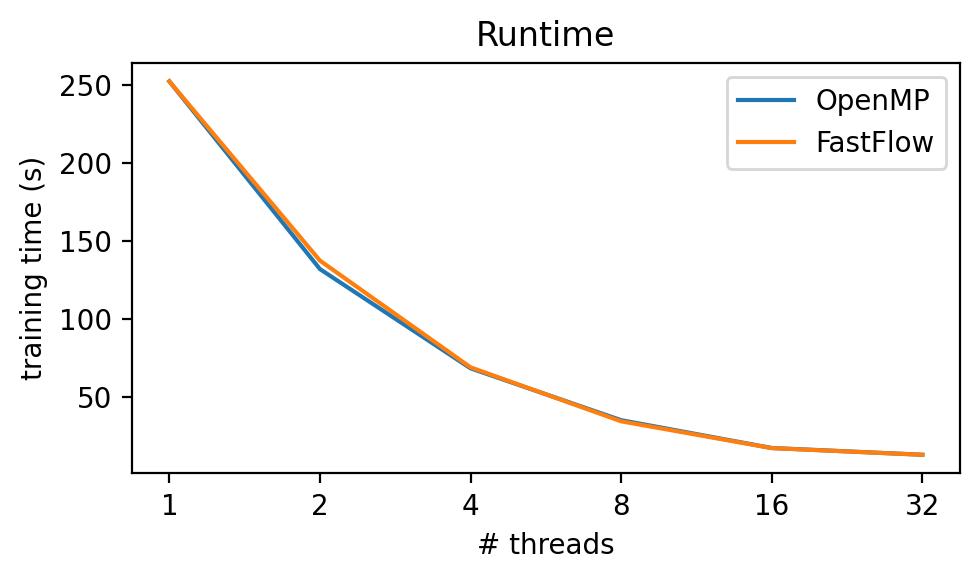

In [27]:
import matplotlib.pyplot as plt


omp = df[(df["backend"] == "omp") | (df["backend"] == "seq")]
ff = df[(df["backend"] == "ff") | (df["backend"] == "seq")]

plt.figure(figsize=(5, 3), dpi=200)
plt.title("Runtime")
plt.plot(omp["threads"], omp["train_time"], label="OpenMP")
plt.plot(ff["threads"], ff["train_time"], label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16, 32]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("training time (s)")
plt.legend()
plt.tight_layout()
plt.show()

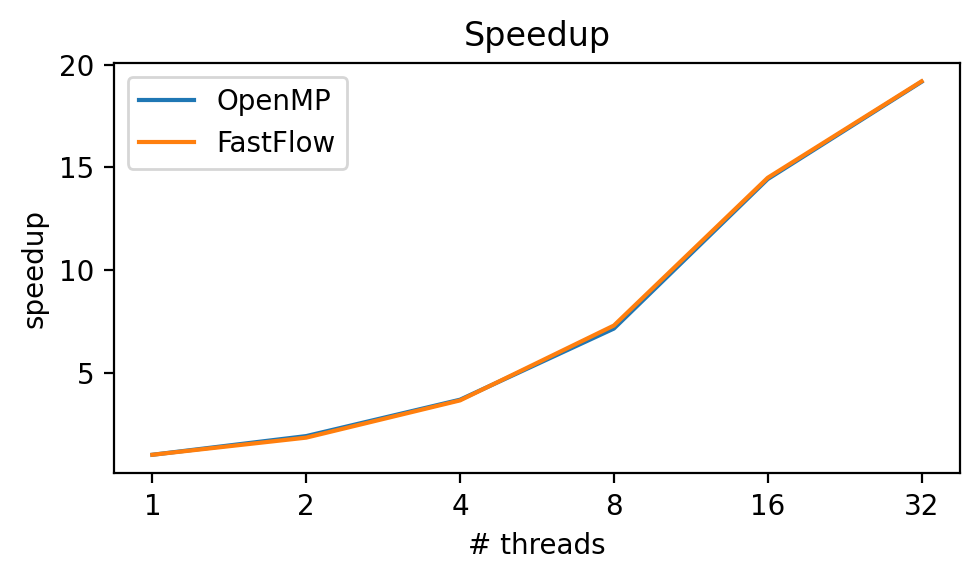

In [28]:
omp_s = (
    df[df["backend"] == "seq"]["train_time"].to_numpy() / omp["train_time"].to_numpy()
)
ff_s = df[df["backend"] == "seq"]["train_time"].to_numpy() / ff["train_time"].to_numpy()


plt.figure(figsize=(5, 3), dpi=200)
plt.title("Speedup")
plt.plot(omp["threads"], omp_s, label="OpenMP")
plt.plot(ff["threads"], ff_s, label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16, 32]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("speedup")
plt.legend()
plt.tight_layout()
plt.show()

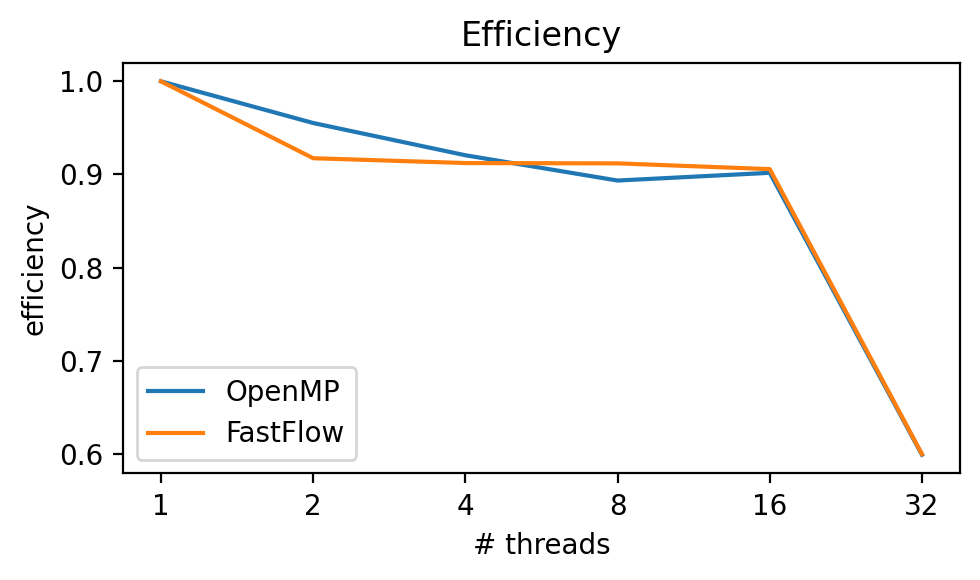

In [29]:
omp_e = omp_s / omp["threads"].to_numpy()
ff_e = ff_s / ff["threads"].to_numpy()


plt.figure(figsize=(5, 3), dpi=200)
plt.title("Efficiency")
plt.plot(omp["threads"], omp_e, label="OpenMP")
plt.plot(ff["threads"], ff_e, label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16, 32]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("efficiency")
plt.legend()
plt.tight_layout()
plt.show()
